<a href="https://colab.research.google.com/github/Jeison68/CarsProject/blob/main/Analisis_dataframe_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal: predecir los gastos médicos de pacientes
---

Para este ejercicio utilizaremos los datos presentados en [este](https://www.kaggle.com/mirichoi0218/insurance) dataset de Kaggle en el cual se presentan datos de seguros médicos.


## Descarga e instalación de librerías

Lo primero que se hará es descargar la librería **[regressors](https://pypi.org/project/regressors/)** que ayudará a hacer un análisis más profundo sobre la regresión lineal.

In [ ]:
!pip install --upgrade pip setuptools==57.5.0
!pip install regressors

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context='notebook')


## Descargando los datos
Descarguemos los datos y veamos cómo se ven.

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analizando los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

(1338, 7)


<Axes: >

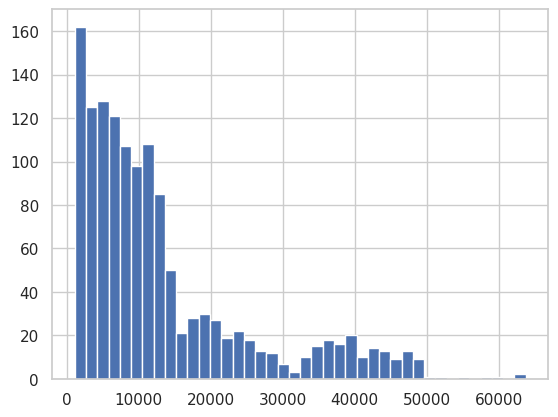

In [ ]:
print(df.shape)
df.charges.hist(bins=40)

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [ ]:
#df[df.charges>50000]
df=df[df.charges<50000]

En este caso, al ser pocos datos (6 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio.

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

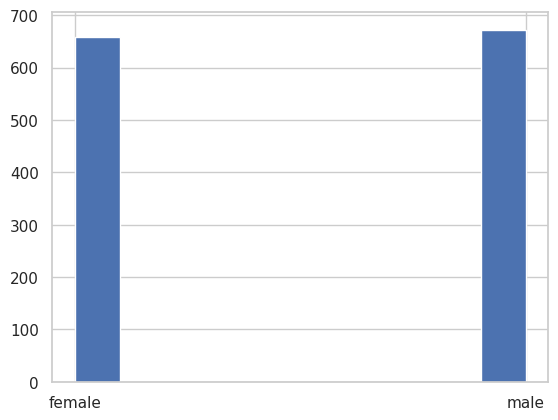

In [ ]:
plt.hist(df['sex'])
plt.show()

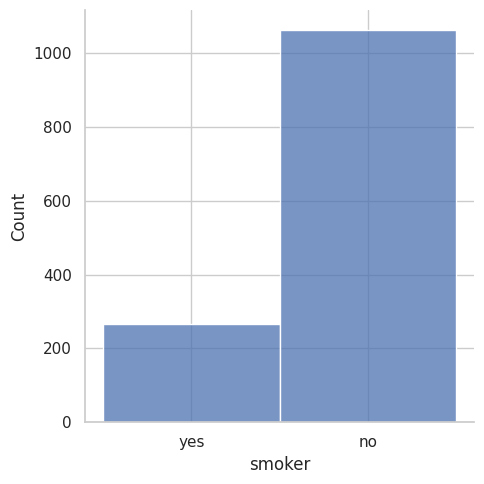

In [ ]:
sns.displot(df['smoker'])
plt.show()

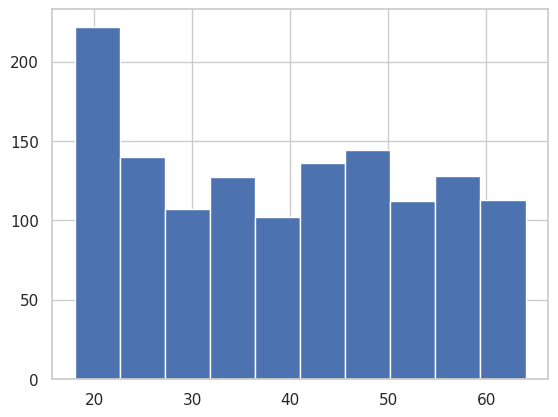

In [ ]:
plt.hist(df['age'])
plt.show()

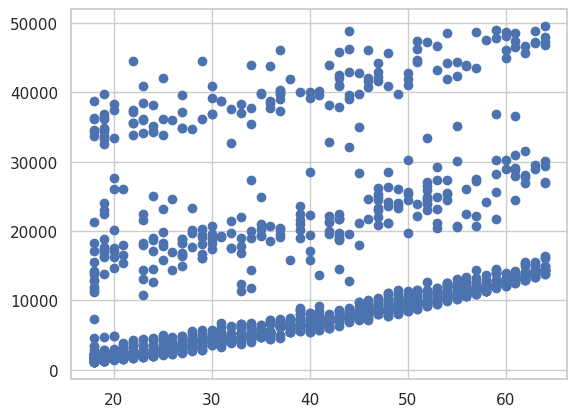

In [ ]:
plt.scatter(df['age'],df['charges'])
plt.show()

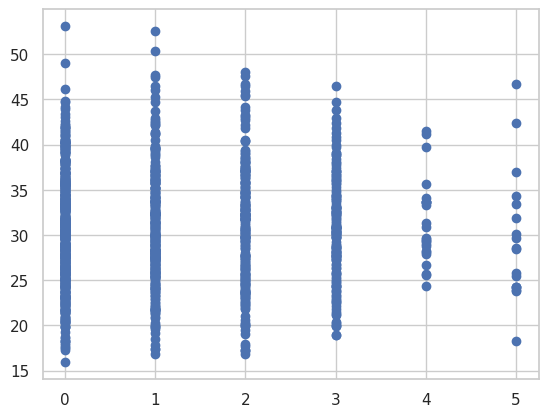

In [ ]:
plt.scatter(df['children'],df['bmi'])
plt.show()

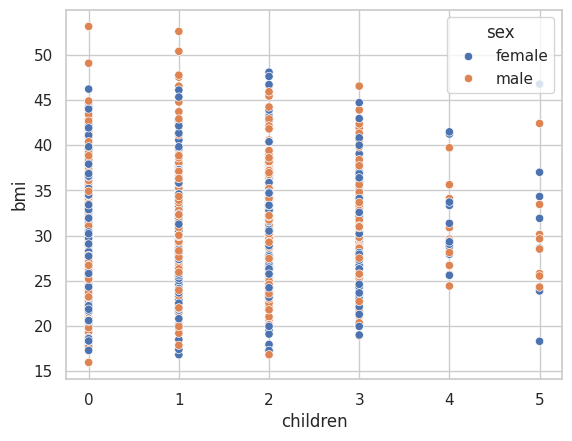

In [ ]:
sns.scatterplot(x='children',y='bmi',data=df, hue='sex')
plt.show()

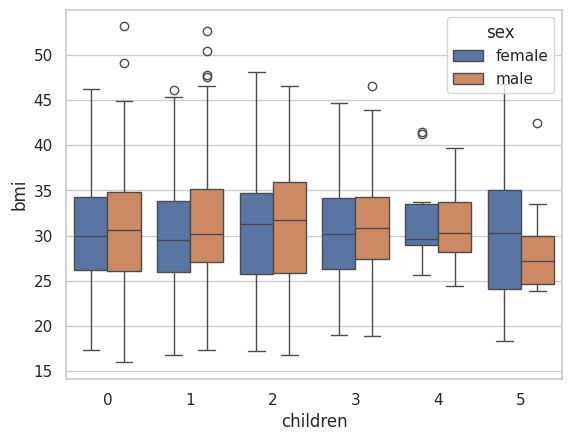

In [ ]:
sns.boxplot(x='children',y='bmi',data=df, hue='sex')
plt.show()

## Viendo correlaciones
Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan.

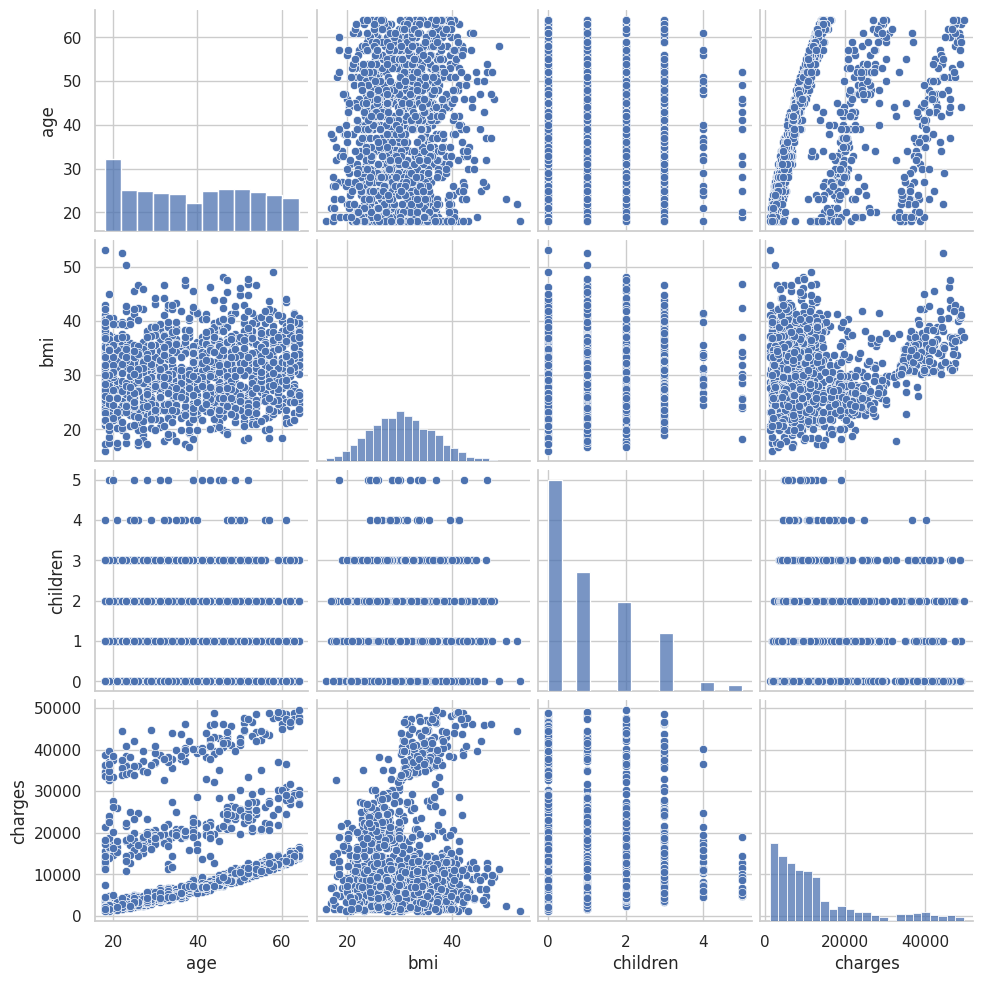

In [ ]:
sns.pairplot(df, height=2.5)
plt.show()

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

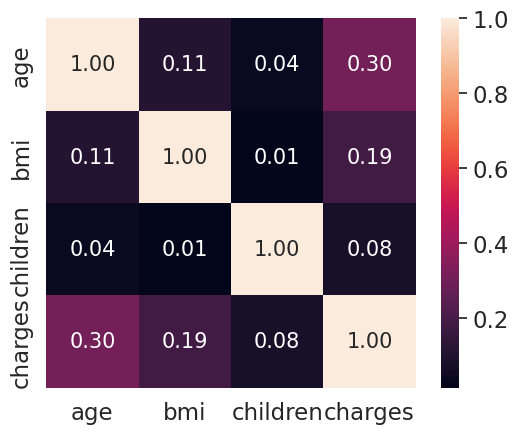

In [ ]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[numeric_columns].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=numeric_columns, xticklabels=numeric_columns)
plt.show()


## Utilizando las demás variables
Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función get_dummies de pandas.

Ahora la verás en acción

In [ ]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype='int64')
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


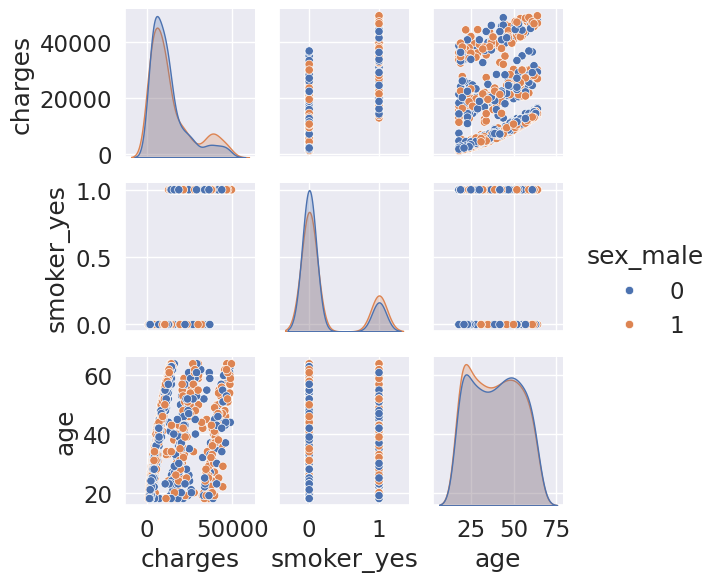

In [ ]:
df_analysis = df[['charges', 'smoker_yes', 'age', 'sex_male']]
sns.pairplot(df_analysis, height=2, hue='sex_male')
plt.show()

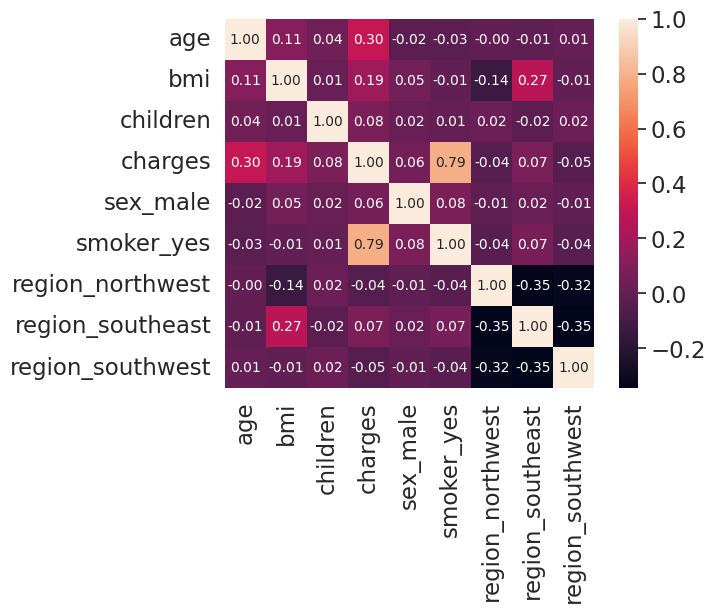

In [ ]:
columns = ['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest',	'region_southeast',	'region_southwest']
cm = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns, xticklabels=columns)
plt.show()


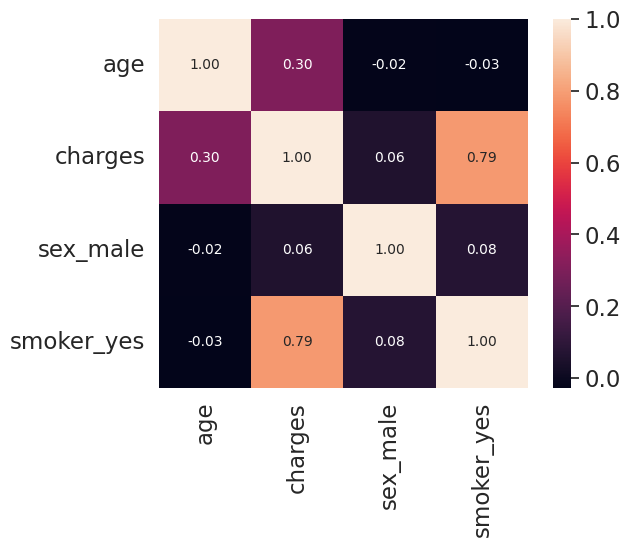

In [ ]:
columns = ['age', 'charges', 'sex_male', 'smoker_yes']
cm = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns, xticklabels=columns)
plt.show()

## Creando modelos
Primero se usará un modelo con todas las variables.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_cols = list(set(df.columns)-set(['charges']))
y_col = ['charges']

X = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc_X = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred.shape

(333, 1)

## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

In [ ]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test, y_pred)

r2= metrics.r2_score(y_test, y_pred)
print("r2: ", round(r2, 4))
print("mse: ", round(mse, 4))

r2:  0.7827
mse:  0.2361


El siguiente código muestra un resumen general de los resultados.

In [ ]:
from regressors import stats
model.inercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [ ]:
# Ensure model.intercept_ is a scalar value
model.intercept_ = model.intercept_[0] if isinstance(model.intercept_, np.ndarray) else model.intercept_
# Reshape model.coef_ to a 1-dimensional array
model.coef_ = model.coef_.reshape(-1)

y_test = y_test.reshape(-1)

print ("========Summary=========")
stats.summary(model, X_test, y_test, X_cols)

========Summary=========
Residuals:
   Min      1Q  Median     3Q    Max
-1.646 -0.0546  0.1214 0.2548 0.9164


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.011410    0.026763   0.4263  0.670143
smoker_yes        0.797190    0.025491  31.2738  0.000000
region_northwest -0.014572    0.031092  -0.4687  0.639607
region_southeast -0.038711    0.032386  -1.1953  0.232833
bmi               0.166545    0.028761   5.7906  0.000000
region_southwest -0.029557    0.030472  -0.9700  0.332756
sex_male          0.005042    0.026737   0.1886  0.850528
children          0.054728    0.028845   1.8973  0.058659
age               0.307144    0.026985  11.3820  0.000000
---
R-squared:  0.78269,    Adjusted R-squared:  0.77732
F-statistic: 145.87 on 8 features


Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

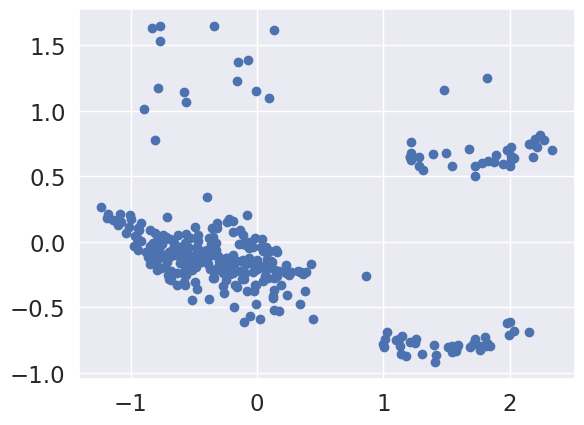

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()


## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

In [ ]:
df_second = df.copy()
df_second['age2'] = df_second['age']**2
df_second['sobrepeso'] = (df_second.bmi>=30).astype(int)
df_second['sobrepeso*fumado']=df_second.sobrepeso*df_second.smoker_yes
df_second.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2,sobrepeso,sobrepeso*fumado
0,19,27.900,0,16884.92400,0,1,0,0,1,361,0,0
1,18,33.770,1,1725.55230,1,0,0,1,0,324,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,784,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0,1089,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,1024,0,0


Analizando el segundo modelo

In [ ]:
#X_cols = list(set(df_second.columns)-set(['charges']))
X_cols = ['sobrepeso*fumado', 'smoker_yes', 'age2', 'children']
y_col = ['charges']

X = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc_X = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred.shape

(333, 1)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2= metrics.r2_score(y_test, y_pred)

print("r2: ", round(r2, 4))
print("mse: ", round(mse, 4))

r2:  0.8212
mse:  0.208


In [ ]:
#model.inercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [ ]:
# Ensure model.intercept_ is a scalar value
model.intercept_ = model.intercept_[0] if isinstance(model.intercept_, np.ndarray) else model.intercept_
# Reshape model.coef_ to a 1-dimensional array
model.coef_ = model.coef_.reshape(-1)

y_test = y_test.reshape(-1)

print ("========Summary=========")
stats.summary(model, X_test, y_test, X_cols)

========Summary=========
Residuals:
    Min     1Q  Median     3Q    Max
-2.0594 0.0578  0.1047 0.1357 0.3259


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.000000    0.025069   0.0000  1.000000
sobrepeso*fumado  0.489136    0.029127  16.7933  0.000000
smoker_yes        0.467934    0.029962  15.6177  0.000000
age2              0.335282    0.024058  13.9364  0.000000
children          0.071132    0.025579   2.7808  0.005731
---
R-squared:  0.82119,    Adjusted R-squared:  0.81901
F-statistic: 376.58 on 4 features


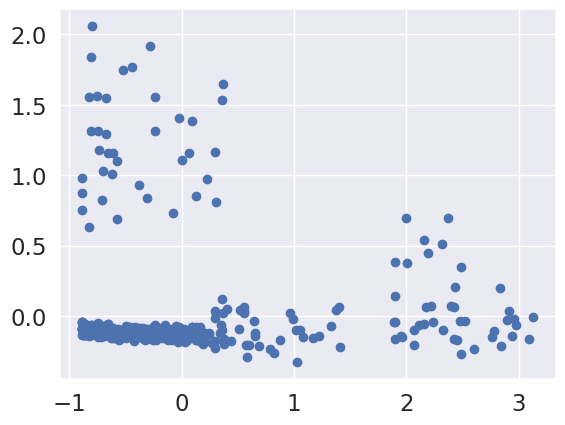

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()